In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [6]:
img = cv2.imread('sports dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg')
img.shape

(1024, 683, 3)

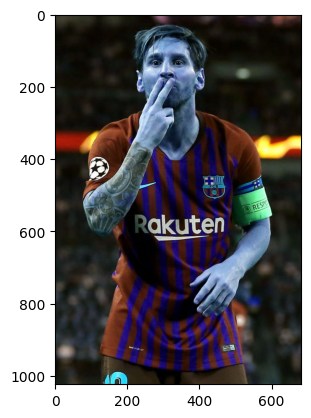

In [7]:
plt.imshow(img)#thid image has colour in it and we have to change it to gray

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape9320

(1024, 683)

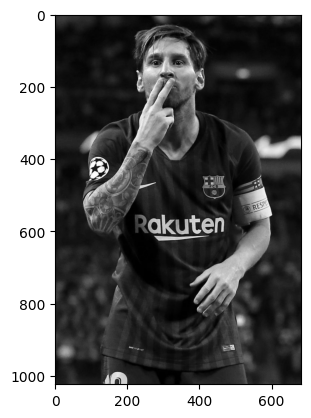

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
len(gray)

1024

In [11]:
face_cass = cv2.CascadeClassifier('opencv/haarcascade_frontalface_default.xml')#file for face detection
eye_cass = cv2.CascadeClassifier('opencv/haarcascade_eye.xml')#file for eyes detection

In [12]:
face = face_cass.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)#ScaleFactor determines the factor of increase in window size
face

array([[214,  56, 191, 191]])

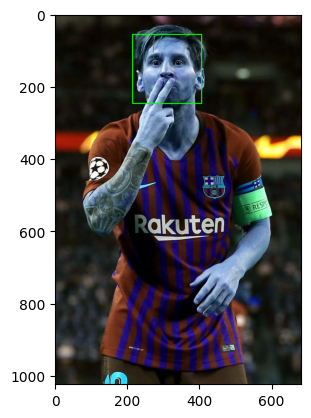

In [13]:
x,y,w,h = face[0]
face_img= cv2.rectangle(img,(x, y),(x+w, y+h), (0, 255,0 ), thickness=2)
plt.imshow(img, cmap='gray')

In [14]:
cv2.destroyAllWindows

<function destroyAllWindows>

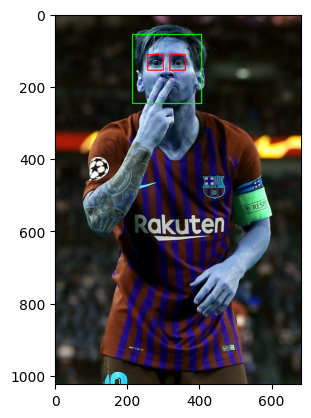

In [15]:
for (x,y,w,h) in face:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cass.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
plt.figure
plt.imshow(face_img, cmap='gray')
plt.show()
    

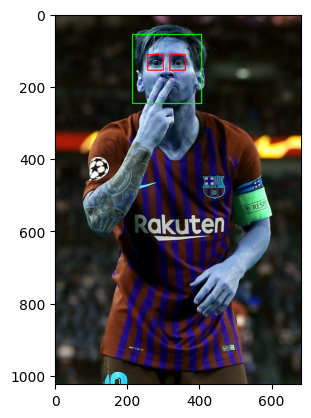

In [16]:
plt.imshow(face_img, cmap='gray')

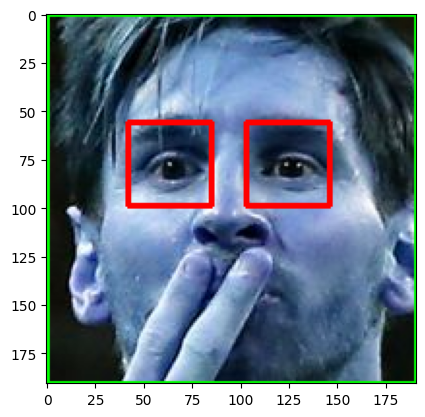

In [17]:
plt.imshow(roi_color, cmap='gray')

In [18]:
def get_image(path):
    image = cv2.imread(path)
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face = face_cass.detectMultiScale(grey, scaleFactor=1.3, minNeighbors=5)
    for (x,y,w,h) in face:
        roi_gray = grey[y:y+h, x:x+w]
        roi_color = image[y:y+h,x:x+w]
        eyes = eye_cass.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
    

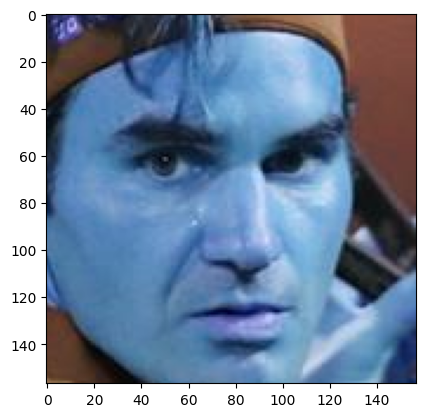

In [19]:
cropped_image = get_image('sports dataset/roger_federer/55d4aba6a570417280c790d119c91ee7_18.jpg')
plt.imshow(cropped_image,cmap='gray')

In [20]:
    cropped_image = get_image('sports dataset\serena_williams\serena-williams-unlimited-greatness.jpg')#image with no clear face
cropped_image

In [21]:
path_to_data = "./sports dataset/"
path_to_cdata = "./sports dataset/cropped/"


In [22]:
#saving all the paths of subfolders in sports dataset in a list
import os
img_paths=[]
for file in os.scandir(path_to_data):#scandir goes thru all the sub directories of the sports dataset
    if file.is_dir():
        img_paths.append(file.path)

In [23]:
img_paths

['./sports dataset/cropped',
 './sports dataset/lionel_messi',
 './sports dataset/maria_sharapova',
 './sports dataset/roger_federer',
 './sports dataset/serena_williams',
 './sports dataset/virat_kohli']

In [24]:
#Now we are adding the folder 'cropped'
import shutil
if os.path.exists(path_to_cdata):#first if the folder exists then we are removing it so that no duplicates present
    shutil.rmtree(path_to_cdata)
os.mkdir(path_to_cdata)#then we are making new directory

In [25]:
cropped_img_paths=[]
cropped_img_dict = {}

for img_dir in img_paths:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    cropped_img_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi = get_image(entry.path)
        if roi is not None:
            cropped_folder = path_to_cdata + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)#until now we are not saving the image
                cropped_img_paths.append(cropped_folder)
                print("Getting cropped folder: ",cropped_folder)
                
            cropped_img_filename = celebrity_name + str(count) + ".png"
            cropped_img_filename_path = cropped_folder + "/" +  cropped_img_filename
            
            cv2.imwrite(cropped_img_filename_path,roi)
            cropped_img_dict[celebrity_name].append(cropped_img_filename_path)

            count+=1


cropped
lionel_messi
Getting cropped folder:  ./sports dataset/cropped/lionel_messi
maria_sharapova
Getting cropped folder:  ./sports dataset/cropped/maria_sharapova
roger_federer
Getting cropped folder:  ./sports dataset/cropped/roger_federer
serena_williams
Getting cropped folder:  ./sports dataset/cropped/serena_williams
virat_kohli
Getting cropped folder:  ./sports dataset/cropped/virat_kohli


In [26]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = cv2.imread(img)
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    
    return imArray_H


In [27]:
#we are gonna use wavelet transforation to extract features from the imageb

In [35]:
class_dict = {}
counts = 0
del cropped_img_dict['cropped']
for celeb in cropped_img_dict.keys():
    class_dict[celeb] = counts
    counts+=1


In [36]:
print(class_dict)

{'lionel_messi': 0, 'maria_sharapova': 1, 'roger_federer': 2, 'serena_williams': 3, 'virat_kohli': 4}


In [37]:
import numpy as np
x = []#creating x and y varialble for the model
y = []
for celebrity_name, training_files in cropped_img_dict.items():
     for training_image in training_files:
            img = cv2.imread(training_image)
            if img is None:
                continue
            scaled_img = cv2.resize(img,(32,32))
            img_hr = w2d(training_image,'db1',5)
            scaled_img_hr = cv2.resize(img_hr,(32,32))
            combined_img = np.vstack((scaled_img.reshape(32*32*3,1),scaled_img_hr.reshape(32*32,1)))
            x.append(combined_img)#stacking the original pic and the har transformed pic vertically
            y.append(class_dict[celebrity_name])
            

In [38]:
len(x)

165

In [39]:
len(y)

165

In [40]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [41]:
len(x[0])

4096

In [42]:
x.shape #x is a  a list and now we are gonna change it into an array

AttributeError: 'list' object has no attribute 'shape'

In [43]:
x = np.array(x).reshape(len(x),4096)

In [44]:
x.shape

(165, 4096)

In [48]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [49]:
#build this model with SVM rbf kernel

In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [52]:
#now preparing the pipeline

In [60]:
pipe = Pipeline([('scale', StandardScaler()),('model',SVC(kernel='rbf',C = 15))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.8095238095238095

In [61]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.60      1.00      0.75         6
           2       1.00      0.71      0.83         7
           3       0.67      0.80      0.73         5
           4       0.86      1.00      0.92        12

    accuracy                           0.81        42
   macro avg       0.82      0.82      0.79        42
weighted avg       0.86      0.81      0.81        42



In [68]:
#Now using gridsearch CV for getting fine best tuned parameters 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [69]:
#now creting a dictionary with different models and parameters for iterating through it and performing the gscv

In [95]:
model_params ={
    'svm':{
        'model':SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    },
    'random_classifier':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    }
}

In [104]:
#now proceding with gridsearch cv code
best_scores = []
best_estimators ={}
for algorithms, mod in model_params.items():
    pipe1 = make_pipeline(StandardScaler(),mod['model'])
    clf = GridSearchCV(pipe1,mod['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    best_scores.append({
        'model':algorithms,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_

    })
    best_estimators[algorithms] = clf.best_estimator_
    

In [105]:
import pandas as pd
df = pd.DataFrame(best_scores)
df.head()

,model,best_score,best_params
0,svm,0.829000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,logistic_regression,0.845667,{'logisticregression__C': 10}
2,random_classifier,0.731000,{'randomforestclassifier__n_estimators': 10}


In [106]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))]),
 'random_classifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))])}

In [107]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.9285714285714286

In [108]:
best_estimators['svm'].score(x_test,y_test)

0.8333333333333334

In [109]:
best_estimators['random_classifier'].score(x_test,y_test)

0.6428571428571429

In [110]:
best_clf = best_estimators['logistic_regression']

In [111]:
#Now saving the model using joblib

In [114]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [113]:
import joblib
joblib.dump(best_clf,'save_model.pkl')

['save_model.pkl']

In [115]:
#Now saving the dictionary for future flask purpose

In [117]:
import json
with open("class_dict.json","w") as f:
    f.write(json.dumps(class_dict))